In [1]:
import numpy as np 
import pandas as pd 
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import json
from IPython.core.display import HTML
from fastnumbers import isfloat 
from fastnumbers import fast_float
from multiprocessing.dummy import Pool as ThreadPool 


sns.set_style('whitegrid')
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Utility Function for Data Type Conversions

In [2]:
def ffloat(string):
    if string is None:
        return np.nan
    if type(string) == float or type(string) == np.float64:
        return string
    if type(string)==int or type(string)==np.int64:
        return string
    
    return fast_float(string.split(" ")[0].replace(',','').replace('%',''),default=np.nan)

In [3]:
def ffloat_list(string_list):
    return list(map(ffloat,string_list))

In [4]:
def remove_multiple_spaces(string):
    if type(string) == str:
        return ' '.join(string.split())
    return string

In [2]:
## User Input for NASDAQ_Symbol

NASDAQ_Symbol = input("Enter Company Symbol")
response = requests.get(f"https://finance.yahoo.com/quote/{NASDAQ_Symbol}", timeout=240)

Enter Company Symbol AMD


## Company Address and Website

In [4]:
URL = "https://finance.yahoo.com/quote/GOOG/profile?guccounter=1"
html_text = requests.get(URL).text
com_soup = BeautifulSoup(html_text,'lxml')
com_soup.prettify()
Company_info = {}
company = com_soup.find("div", attrs = {'class':"asset-profile-container"})
print(company)
for i,string in enumerate(company.strings):
    if i == 0:
        Company_info["name"] = string
        continue
    if i == 1:
        Company_info["address"] = string
        continue
    if i < 4:
        Company_info["address"] += ", " + string
    if i == 4:
        Company_info["telephone_no"] = string
    if i == 5:
        Company_info["website"] = string
    if i == 8:
        Company_info["Sector(s)"] = string
    if i == 11:
        Company_info["Industry"] = string
    if i == 14:
        Company_info["full_time_employees"] = string
        
    
Company_info

'<!DOCTYPE html>\n<html lang="en-us">\n <head>\n  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>\n  <meta charset="utf-8"/>\n  <title>\n   Yahoo\n  </title>\n  <meta content="width=device-width,initial-scale=1,minimal-ui" name="viewport"/>\n  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>\n  <style>\n   html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 0;\n 

None


AttributeError: 'NoneType' object has no attribute 'strings'

## Company Description

In [ ]:
URL = f"https://finance.yahoo.com/quote/{NASDAQ_Symbol}/profile"
html_text = requests.get(URL).text
des_soup = BeautifulSoup(html_text,'lxml')

Description = des_soup.find('p',class_="Mt(15px) Lh(1.6)").text

Description

## Stock Price Chart

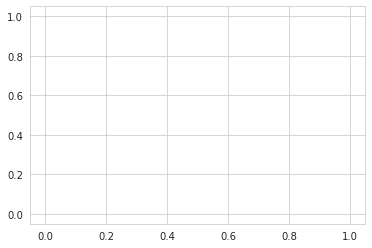

In [4]:

#NASDAQ_Symbol = input("Enter Company Symbol")
URL = f"https://finance.yahoo.com/quote/{NASDAQ_Symbol}/history"
#URL = f"https://finance.yahoo.com/quote/GOOG/history"
html_text = requests.get(URL).text
soup = BeautifulSoup(html_text,'lxml')
rows = soup.find_all('tr',class_="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)")

Adj_Close = []

reactid = 63
for row in rows:
    close_val = row.find('span', attrs = {'data-reactid':reactid})
    if close_val == None:
        continue
    Adj_Close.append(ffloat(close_val.text))
    reactid += 15

plt.plot(Adj_Close[::-1])
plt.show()

## Company's Financial

In [ ]:
## Income Statement
URL = f"https://finance.yahoo.com/quote/{NASDAQ_Symbol}/financials"
html_text = requests.get(URL).text
soup = BeautifulSoup(html_text,'lxml')
Table = soup.find('div',class_="M(0) Whs(n) BdEnd Bdc($seperatorColor) D(itb)")


## Header Information
Header = Table.find('div',attrs = {"class":"D(tbhg)","data-reactid":"36"})
span_tags = Header.find_all('span')

Income_Statement = {}

Income_Statement[span_tags[0].text] = [span_tags[i].text for i in range(1,6)]


Breakdown_spans = soup.find_all('span',class_="Va(m)")

#Col Data
fin_cols = Table.find_all('div',attrs = {"data-test":"fin-col"})

column = []

for i,fin_col in enumerate(fin_cols):
    if i%5 == 0:
        column.append([fin_col.text])
    column[-1].append(fin_col.text)
    

for i,span_tag in enumerate(Breakdown_spans):
    Income_Statement[span_tag.text] = column[i]

Income_Statement

In [ ]:
## Balance Sheet
URL = f"https://finance.yahoo.com/quote/{NASDAQ_Symbol}/balance-sheet"
html_text = requests.get(URL).text
soup = BeautifulSoup(html_text,'lxml')

Balance_Sheet_Table = soup.find('div',class_="M(0) Whs(n) BdEnd Bdc($seperatorColor) D(itb)")
BS_span_tags = Balance_Sheet_Table.find_all('span')


Balance_Sheet = {}
for i, span_tag in enumerate(BS_span_tags):
        if i%5 == 0:
            key = span_tag.text 
            Balance_Sheet[key] = []
            continue
        Balance_Sheet[key].append(span_tag.text)

Balance_Sheet

## Analysis Tables

In [ ]:

URL = f"https://finance.yahoo.com/quote/{NASDAQ_Symbol}/analysis"
html_text = requests.get(URL).text
Analysis = BeautifulSoup(html_text,'lxml')

Tables = Analysis.find_all('table',class_="W(100%) M(0) BdB Bdc($seperatorColor) Mb(25px)")
#Tables



Tables_lst = []

for i,Table_info in enumerate(Tables):
    Table = {}
    
    spans_finds = Table_info.find_all('span') 
    
    if i == 2:
        Table[spans_finds[0].text] = [spans_finds[1].text,spans_finds[2].text,
                                        spans_finds[3].text,spans_finds[4].text]

        spans_finds = spans_finds[5:]

        for i, span_tag in enumerate(spans_finds):
            if i%5 == 0:
                span_key = span_tag.text 
                Table[span_key] = []
                continue
            Table[span_key].append(span_tag.text)
        
        Tables_lst.append(Table)
        
        continue
        
    if i == 5:
        th_finds = Tables[5].find_all('th') 
        td_finds = Tables[5].find_all('td') 

        table_finds = th_finds + td_finds

        for i, tag in enumerate(table_finds):
            if i%5 == 0:
                key = tag.text 
                Table[key] = []
                continue
            Table[key].append(tag.text)
        
        Tables_lst.append(Table)
        continue
        
    
    Table[spans_finds[0].text] = [spans_finds[1].text,spans_finds[4].text,
                                      spans_finds[7].text,spans_finds[9].text]

    spans_finds = spans_finds[11:]

    for i, span_tag in enumerate(spans_finds):
        if i%5 == 0:
            span_key = span_tag.text 
            Table[span_key] = []
            continue
        Table[span_key].append(span_tag.text)
     
    Tables_lst.append(Table)
    

    
Tables_lst